In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import numpy as np, seaborn as sns

In [49]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib as mpl
# import matplotlib.patches as mpatches

In [149]:
import matplotlib.backends.backend_pdf

# Overview heatmap: LSFF data coverage

In [4]:
## load legal combos
import pickle
data_prep_dir = '/ihme/homes/beatrixh/notebooks/viv_rsc/data_prep/inputs/'

with open(data_prep_dir + 'lsff_vehicle_nutrient_pairs.pickle', 'rb') as handle:
    vehicle_nutrient_map = pickle.load(handle)
    
with open(data_prep_dir + 'lsff_country_vehicle_pairs.pickle', 'rb') as handle:
    country_vehicle_map = pickle.load(handle)
    
with open(data_prep_dir + 'lsff_vehicle_country_pairs.pickle', 'rb') as handle:
    vehicle_country_map = pickle.load(handle)

In [9]:
path = '/ihme/homes/beatrixh/notebooks/viv_rsc/data_prep/outputs/lsff_data_estimated.csv'
df = pd.read_csv(path)

In [11]:
# for convenience:
value_d_codes = {'percent of population eating vehicle': 'A',
 'percent of population eating industrially produced vehicle': 'B',
 'percent of population eating fortified vehicle': 'C',
 'percent of vehicle that is industrially produced': 'D',
 'percent of vehicle that is fortified': 'E',
 'percent of market covered by fortified product': 'F'}

In [17]:
df.rename(columns=value_d_codes, inplace=True)

In [83]:
x = df.groupby(['location_name','vehicle']).mean().reset_index()

In [84]:
x['status'] = sum([x.A.notna(),x.B.notna(),x.C.notna()])

In [85]:
x = pd.pivot_table(data=x, index='location_name',columns='vehicle',values='status').fillna(-1).reset_index()

In [86]:
x = x.set_index(x.location_name).drop(columns = 'location_name')

In [87]:
x.columns

Index(['bouillon', 'maize flour', 'oil', 'rice', 'salt', 'wheat flour'], dtype='object', name='vehicle')

In [92]:
x = x[['wheat flour','maize flour','oil','salt','bouillon']]

In [166]:
x.index.name = ''

In [170]:
x.columns.name = ''

In [124]:
cascade = np.array([[149/256, 165/256, 166/256, 1]])
hoki = np.array([[103/256, 128/256, 159/256, 1]])
mystic = np.array([[232/256, 236/256, 241/256, 1]])
silver = np.array([[191/256, 191/256, 191/256, 1]])

In [142]:
navy = np.array([[44/256, 39/256, 134/256, 1]])
lightblue = np.array([[101/256, 157/256, 226/256, 1]])
green = np.array([[90/256, 186/256, 126/256, 1]])
orange = np.array([[228/256, 118/256, 63/256, 1]])

In [180]:
def colormap():
    cmap = cm.get_cmap('RdYlBu')(np.linspace(1/4,1,3)) #colors for nonzero vals
    cmap = np.concatenate([mystic, orange, lightblue, navy])
    cmap = ListedColormap(cmap)

    fig, ax = plt.subplots(figsize=(25,15))
    heat_map = sns.heatmap(x, cmap=cmap, linewidths = 0.1, cbar=False)
    sns.set(font_scale = 1.5)

    cax = ax.imshow(x, interpolation='nearest', cmap=cmap)
    cbar = fig.colorbar(cax, ticks=np.arange(-1,3) + 0.5)
    cbar.outline.set_visible(False)
    cbar.ax.set_yticklabels([' Not modeled',
                             ' No data',
                             ' Have partial data on vehicle consumption;\n amount fortifiable unknown',
                             ' Have data on consumption\n and fortifiable consumption'])
    plt.xticks(rotation=90)
    plt.title("LSFF Model: input data coverage", fontsize = 26)
    return fig

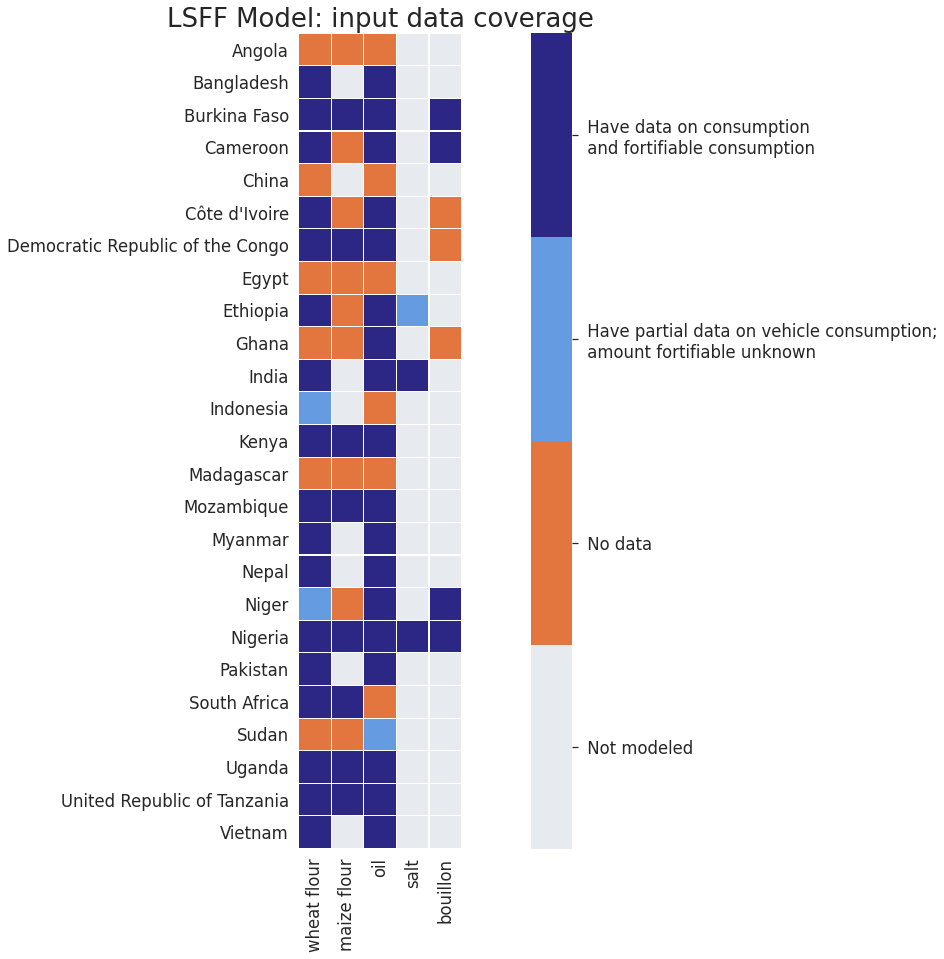

In [181]:
save_path = '/ihme/homes/beatrixh/notebooks/viv_rsc/data_prep/outputs/plots/data_coverage_overview_heatmap.pdf'
pdf = matplotlib.backends.backend_pdf.PdfPages(save_path)

fig = colormap()
pdf.savefig(fig)
pdf.close()